# 7 principal component analisis

In [1]:
import numpy as np

In [2]:
marks = np.array([[90,90,60,60,30],[60,90,60,60,30],[90,30,60,90,30]])

In [3]:
mean_marks = np.mean(marks,axis=1)
mean_marks

array([66., 60., 60.])

In [5]:
covmat = np.cov(marks,bias=True)
covmat

array([[504., 360., 180.],
       [360., 360.,   0.],
       [180.,   0., 720.]])

In [6]:
eig_val,eig_vec = np.linalg.eig(covmat)
eig_val

array([ 44.81966028, 910.06995304, 629.11038668])

In [7]:
eig_vec

array([[ 0.6487899 , -0.65580225, -0.3859988 ],
       [-0.74104991, -0.4291978 , -0.51636642],
       [-0.17296443, -0.62105769,  0.7644414 ]])

In [8]:
eig_pairs =[(np.abs(eig_val[i]),eig_vec[:,i]) for i in range(len(eig_val))]

eig_pairs.sort(key=lambda x: x[0],reverse=True)
for i in eig_pairs :
    print(i[0])

910.0699530410361
629.1103866763253
44.81966028263878


In [9]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),eig_pairs[1][1].reshape(3,1)))
print('Matrix W : \n', matrix_w)

Matrix W : 
 [[-0.65580225 -0.3859988 ]
 [-0.4291978  -0.51636642]
 [-0.62105769  0.7644414 ]]


In [10]:
transformed = matrix_w.T.dot(marks-mean_marks.reshape(3,1))
transformed

array([[-34.37098481,  -9.98345733,   3.93481353, -14.69691716,
         55.11654576],
       [ 13.66927088, -47.68820559,   2.31599277,  25.24923474,
          6.45370719]])

In [11]:
from sklearn.decomposition import PCA as sklearnPCA


In [13]:
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(marks.T)
sklearn_transf

array([[-34.37098481, -13.66927088],
       [ -9.98345733,  47.68820559],
       [  3.93481353,  -2.31599277],
       [-14.69691716, -25.24923474],
       [ 55.11654576,  -6.45370719]])

In [14]:
sklearn_pca.components_

array([[-0.65580225, -0.4291978 , -0.62105769],
       [ 0.3859988 ,  0.51636642, -0.7644414 ]])

In [15]:
eig_val[::-1].sort()
eig_val

array([910.06995304, 629.11038668,  44.81966028])

In [16]:
eig_val/eig_val.sum()

array([0.57453911, 0.39716565, 0.02829524])

In [17]:
sklearn_pca.explained_variance_ratio_

array([0.57453911, 0.39716565])

In [18]:
sklearn_pca.explained_variance_ratio_.cumsum()

array([0.57453911, 0.97170476])

In [20]:
marks1 = np.array([[90,90,60,60,30],[60,90,60,60,30],[90,30,60,90,30],[90,60,30,60,90]])

In [22]:
sklearn_pca = sklearnPCA(n_components=4)
sklearn_transf = sklearn_pca.fit_transform(marks1.T)
sklearn_transf

array([[-2.54537921e+01, -3.03217648e+01, -2.16302458e+01,
        -4.10213500e+00],
       [-1.53913876e+01,  4.21704242e+01, -1.97922323e+01,
         2.24233100e+00],
       [-5.27970789e+00,  1.52354252e+01,  3.23787728e+01,
        -4.86020310e+00],
       [-1.37281060e+01, -2.14560478e+01,  1.66556912e+01,
         6.76498860e+00],
       [ 5.98529936e+01, -5.62803687e+00, -7.61198589e+00,
        -4.49815030e-02]])

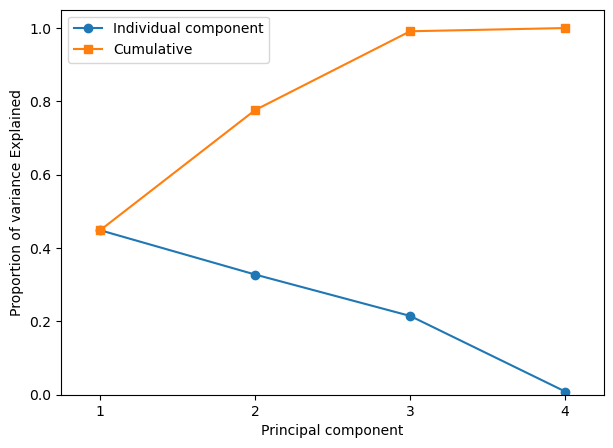

In [23]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,5))
plt.plot([1,2,3,4],sklearn_pca.explained_variance_ratio_,'-o',label='Individual component')
plt.plot([1,2,3,4],np.cumsum(sklearn_pca.explained_variance_ratio_),'-s',label='Cumulative')
plt.ylabel('Proportion of variance Explained')
plt.xlabel('Principal component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2)
plt.show()